In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import pandas as pd
import numpy as np

# Load train and test datasets using Pandas
train_data = pd.read_csv('/content/drive/MyDrive/Practice/MNIST(Ass2&3)/mnist_train.csv').values
test_data = pd.read_csv('/content/drive/MyDrive/Practice/MNIST(Ass2&3)/mnist_test.csv').values

# Assuming your data is organized with the first column as the label and the rest as image pixels
# Extract features (images) and labels
x_train = train_data[:, 1:]  # Exclude the first column which contains labels
y_train = train_data[:, 0]  # First column contains labels

x_test = test_data[:, 1:]  # Exclude the first column which contains labels
y_test = test_data[:, 0]  # First column contains labels

# Reshape the train and test data to represent images
image_width = 28
image_height = 28
num_channels = 1  # Assuming grayscale images

x_train = x_train.reshape(x_train.shape[0], image_width, image_height, num_channels)
x_test = x_test.reshape(x_test.shape[0], image_width, image_height, num_channels)


In [4]:
print('Shape of train : ' , x_train.shape)
print('Shape of test : ' , x_test.shape)

Shape of train :  (60000, 28, 28, 1)
Shape of test :  (10000, 28, 28, 1)


In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation = "softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [8]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(x_train,y_train,batch_size = 256,epochs = 50)

Epoch 1/50
235/235 [==============================] - 16s 66ms/step - loss: 0.3036 - accuracy: 0.9129
Epoch 2/50
235/235 [==============================] - 15s 65ms/step - loss: 0.1061 - accuracy: 0.9684
Epoch 3/50
235/235 [==============================] - 15s 65ms/step - loss: 0.0715 - accuracy: 0.9786
Epoch 4/50
235/235 [==============================] - 15s 65ms/step - loss: 0.0546 - accuracy: 0.9828
Epoch 5/50
235/235 [==============================] - 15s 65ms/step - loss: 0.0436 - accuracy: 0.9862
Epoch 6/50
235/235 [==============================] - 15s 65ms/step - loss: 0.0359 - accuracy: 0.9885
Epoch 7/50
235/235 [==============================] - 15s 65ms/step - loss: 0.0298 - accuracy: 0.9903
Epoch 8/50
235/235 [==============================] - 15s 65ms/step - loss: 0.0254 - accuracy: 0.9920
Epoch 9/50
235/235 [==============================] - 15s 65ms/step - loss: 0.0220 - accuracy: 0.9933
Epoch 10/50
235/235 [==============================] - 15s 65ms/step - loss: 0.019

In [9]:
test_loss,test_acc = model.evaluate(x_test, y_test)
print('loss-%.3f' %test_loss)
print('Accuracy-%.3f' %test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0685 - accuracy: 0.9875
loss-0.068
Accuracy-0.988


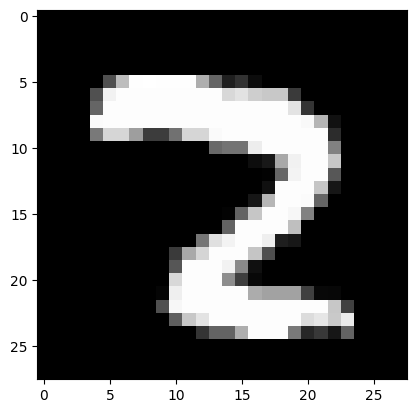

In [10]:
image = x_train[28]
plt.imshow(np.squeeze(image), cmap="gray")
plt.show()

In [11]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict_model = model.predict([image])
print("Predicted Class : {}".format(np.argmax(predict_model)))

1/1 [==============================] - 0s 83ms/step
Predicted Class : 2


In [12]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy'])


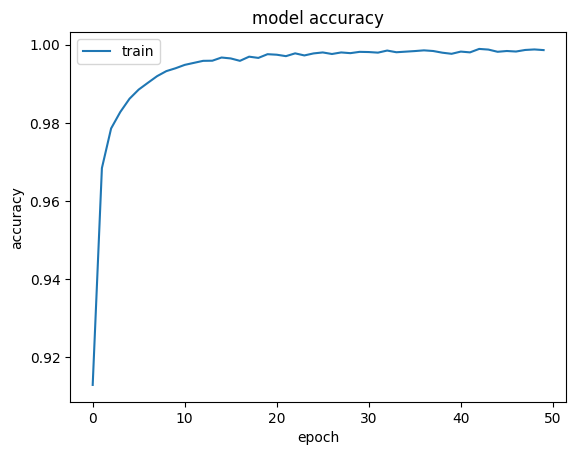

In [13]:
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

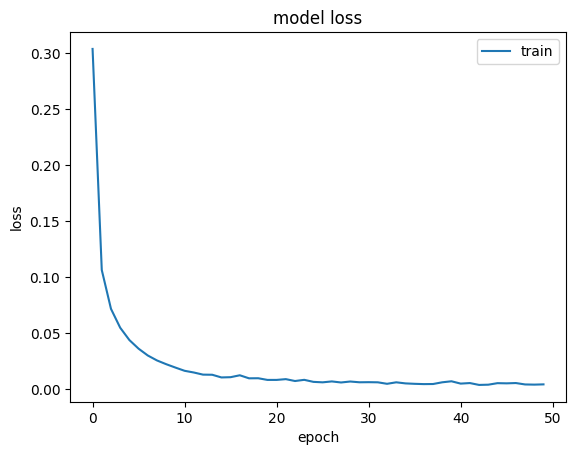

In [14]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()